## Histograms | Asteroid Impact Probability

Given the orbital data of NEOs, we would like to build a regression model to predict the likelihood of impact.  First let's explore our data. 

#### Import Libraries & Setup Engines

In [1]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

#### Read SQL table
We are going to analyze some NEO asteriod measurements from NASA's Sentry system

In [4]:
table = 'ASTEROID_IMPACT'

query = f"SELECT * FROM {table}"
df = pd.read_sql_query(query, sql_engine, index_col='Object Name')
df.head()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
Object Name,,,,,,,,,,
2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


### Plot a Histogram - Impact Probability
Let's take a look at what the distribution of Cumulative Impact Probability looks like

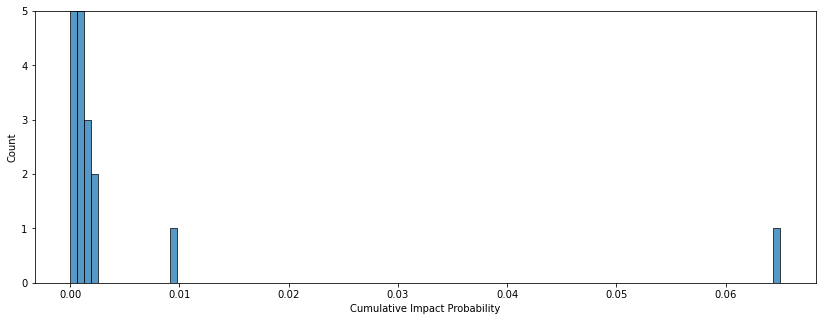

In [17]:
plt.figure(figsize=(14,5))
sns.histplot(x='Cumulative Impact Probability', data=df, bins=100)
plt.ylim(0,5)
plt.show()

Ok, I wasn't expecting one of these to have such high probability.. let's ignore that for now.. and hope the bulk of the probability is during passes in the far future..

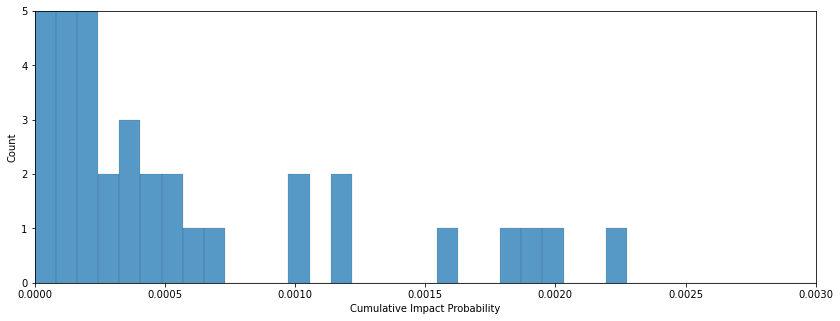

In [26]:
plt.figure(figsize=(14,5))
sns.histplot(x='Cumulative Impact Probability', data=df, bins=800)
plt.xlim(0, 0.003)
plt.ylim(0, 5)
plt.show()

Let's zoom in more on that range under 0.00025

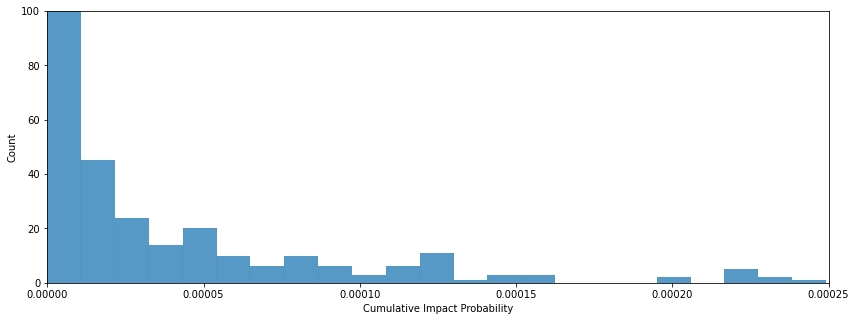

In [28]:
plt.figure(figsize=(14,5))
sns.histplot(x='Cumulative Impact Probability', data=df, bins=6000)
plt.xlim(0, 0.00025)
plt.ylim(0, 100)
plt.show()

Alright it looks like a hyperbola, that's comforting.

#### Real quick, let's check on that outlier just to make sure

In [31]:
df[df['Cumulative Impact Probability'] > 0.06]

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
Object Name,,,,,,,,,,
2010 RF12,2095,2115,52,0.065,5.1,28.4,0.007,-3.2,-3.2,0


Nice, we don't have to worry about that for a while. 

### Plot another Histogram - Velocity
We are curious about the distribution of asteriod velocities because reasons

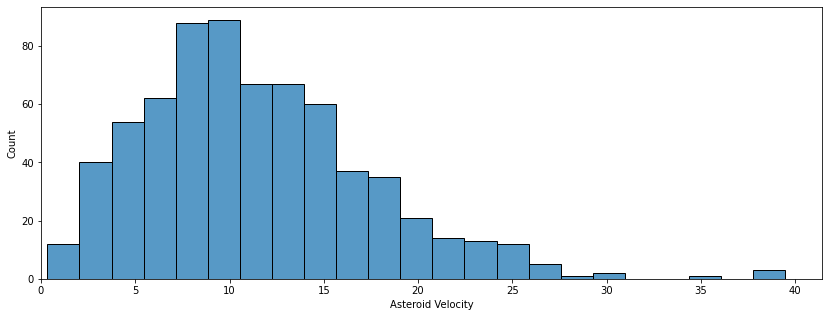

In [35]:
plt.figure(figsize=(14,5))
sns.histplot(x='Asteroid Velocity', data=df)
plt.xlim(0,)
plt.ylim(0)
plt.show()

A nice looking distribution with the mode around 7-8 velocity units

### Plot yet another Histogram - Magnitude

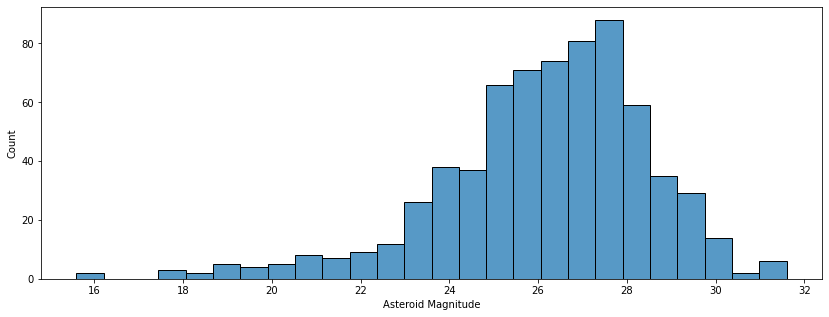

In [37]:
plt.figure(figsize=(14,5))
sns.histplot(x='Asteroid Magnitude', data=df)
plt.show()

Interesting, velocity has a fat tail on the right, and magnitude has one on the left. We can explore a possible connection here in the **correlation_matrix** notebook

### Alright one last Histogram - Diameter
Let's look at how big these things are

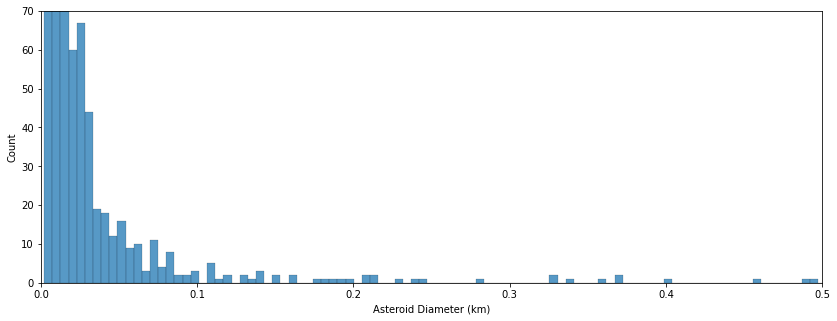

In [44]:
plt.figure(figsize=(14,5))
sns.histplot(x='Asteroid Diameter (km)', data=df)
plt.xlim(0, 0.5)
plt.ylim(0, 70)
plt.show()

Lots and lots of little asteriods and a few pretty big ones.  The high probability one is small, I checked. 

### Findings
We got a better idea of how our data is distributed.  We are now interested in how these variables interact with eachother. For that, take a look at the **correlation_matrix** and **scatter_plots** notebooks